In [1]:
# import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice
import matplotlib as mpl
from amftrack.pipeline.final_analysis.density_wave import plot_single_plate,plot_single_plate_biovolume
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
from amftrack.util.plot import gridplot, make_stat
from helper import *
from load_dataframes import load_all
from plates import plates,timestep
%store -r path_figure
%matplotlib widget
%load_ext autoreload
%autoreload 2
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy
import statsmodels.api as sm
import hashlib
from matplotlib.patches import Ellipse
import logging
plt.style.use('presentation.mplstyle')
logging.getLogger().setLevel(logging.WARNING)


c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
path_figure = r"C:\Users\coren\Documents\PhD\paper\PandC\Fig4"


In [3]:
df,final_data = load_all(plates)

C:\Users\coren\Documents\PhD\Code\pycode\P_depletion_paper\final_figures\load_dataframes.py:111: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sum['start'] = pd.to_datetime(df_sum['start'], errors='coerce')
C:\Users\coren\Documents\PhD\Code\pycode\P_depletion_paper\final_figures\load_dataframes.py:112: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sum['crossed']  = pd.to_datetime(df_sum['crossed'], errors='coerce')
C:\Users\coren\Documents\PhD\Code\pycode\P_depletion_paper\final_figures\load_dataframes.py:113: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsi

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\\\Users\\\\coren\\\\AMOLF-SHIMIZU Dropbox\\\\HFSP_symbiotic-networks\\\\Article_TravellingWave\\\\Supplementary material\\\\extended_data_figures\\Figure_rebutal_root.pdf'

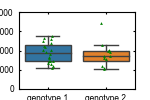

In [4]:
# plt.style.use('presentation2.mplstyle')

# df['density_Lum'] = df['density_L'] *1000
# path_figure = r'C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\HFSP_symbiotic-networks\\Article_TravellingWave\\Supplementary material\\extended_data_figures'

# width = 1.5
# height = 1
# flierprops = dict(markersize=1)
# fig,ax = plt.subplots(figsize=(width,height))
# select = df[df['real_root'].isin(['Carrot Vasilis','Carrot Toby'])]
# select = select[select['fungalC'].isin(["'100P100N'",'100P100N'])]

# select = select[select['strain']=="'C2'"]
# # select= merged_df
# sns.boxplot(select,x='real_root', y = "density_Lum", ax=ax, showfliers=False)
# sns.stripplot(select,x='real_root', y = "density_Lum", ax=ax, color='green', marker='^',size = 2,)
# ax.set_xticklabels(['genotype 1', 'genotype 2'])
# ax.set_xlabel("Root genotype")

# # for index,row in select.iterrows():
# #     ax.text(row['age'],row['speed'],row['unique_id'])
# # ax.set_xlabel('')
# ax.set_ylabel("saturation density \n ($\mu m/mm^{2}$)")
# ax.set_ylim(0,4000)
# plt.savefig(os.path.join(path_figure,'Figure_rebutal_root.pdf'), transparent=True, bbox_inches='tight')
# path_figure = r"C:\Users\coren\Documents\PhD\paper\PandC\Fig4"
# plt.style.use('presentation.mplstyle')


In [ ]:
# plt.style.use('presentation2.mplstyle')

# df['density_Lum'] = df['density_L'] *1000
# path_figure = r'C:\\Users\\coren\\AMOLF-SHIMIZU Dropbox\\HFSP_symbiotic-networks\\Article_TravellingWave\\Supplementary material\\extended_data_figures'

# width = 1.5
# height = 1
# # flierprops = dict(markersize=1)
# fig,ax = plt.subplots(figsize=(width,height))
# select = df[df['real_root'].isin(['Carrot Vasilis','Carrot Toby'])]
# select = select[select['fungalC'].isin(["'100P100N'",'100P100N'])]

# select = select[select['strain']=="'C2'"]
# # select= merged_df
# sns.boxplot(select,x='real_root', y = "speed", ax=ax, showfliers=False)
# sns.stripplot(select,x='real_root', y = "speed", ax=ax, color='green', marker='^',size = 2,)

# # for index,row in select.iterrows():
# #     ax.text(row['age'],row['speed'],row['unique_id'])
# ax.set_xlabel('')
# ax.set_ylabel("wave speed  \n ($\mu m$ $h^{-1}$)")
# # ax.set_ylim(0,4000)
# plt.savefig(os.path.join(path_figure,'Figure_rebutal_root_speed.pdf'), transparent=True, bbox_inches='tight')
# path_figure = r"C:\Users\coren\Documents\PhD\paper\PandC\Fig4"
# plt.style.use('presentation.mplstyle')


In [6]:
select = final_data[final_data['strain']=='A5']
sns.scatterplot(data=select,x='time_since_begin_h',y='tot_length_study',hue = "unique_id")


<AxesSubplot: xlabel='Root genotype', ylabel='saturation density \n ($\\mu m/mm^{2}$)'>

In [7]:
path_figure = r"C:\Users\coren\Documents\PhD\paper\PandC\Fig4"

Vmax = 3.3e-9 #ugP/um2/hour
density = 1e-6 #ug/um3
dry_wet_ratio = 0.21*1.1
carbon_ratio = 0.5
carbon_ratio_spore = 0.9
dry_wet_ratio_spore = 0.9
density_spore = 0.9e-6
respiration_ratio = 0.5

In [8]:
def calculate_derivative(df, column, new_column, window=1):
    # Ensure the DataFrame is sorted by 'unique_id' and 'time_since_begin_h'
    df.sort_values(by=['unique_id', 'time_since_begin_h'], inplace=True)
    
    # Calculate the time difference and value difference over the desired window
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_h'].transform(lambda x: x.diff(window)).fillna(0)
    df['value_diff'] = df.groupby('unique_id')[column].transform(lambda x: x.diff(window)).fillna(0)

    # Calculate the derivative (value difference divided by time difference)
    # Be cautious about dividing by zero. If 'time_diff' is 0, set derivative to NaN or handle accordingly.
    df[new_column] = df.apply(lambda x: x['value_diff'] / x['time_diff'] if x['time_diff'] != 0 else None, axis=1)

    # Drop the helper columns
    df.drop(['time_diff', 'value_diff'], axis=1, inplace=True)
def calculate_integral(df, column, new_column):
    # Calculate the time difference within each group
    df.sort_values(by=['unique_id', 'time_since_begin_h'], inplace=True)
    df['time_since_begin_hour'] = df['time_since_begin_h']
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_hour'].transform(lambda x: x.diff())

    # Calculate the average length density within each group
    df['avg_length_density'] = df.groupby('unique_id')[column].transform(lambda x: x.rolling(window=2).mean())

    # Calculate the "area" (using Trapezoidal rule) for each pair of rows within each group
    df['area'] = df['time_diff'] * df['avg_length_density']

    # Perform the integration (cumulative sum of "area") within each group
    df[new_column] = df.groupby('unique_id')['area'].transform(lambda x: x.cumsum())

    # Drop the helper columns if needed
    df.drop(['time_diff', 'avg_length_density', 'area'], axis=1, inplace=True)
baseline = final_data[final_data['time_since_begin_h'] == 0]

# Step 2: Create a series with spore_volume at time_since_begin_h = 0 for each unique_id
baseline_volume = baseline.groupby('unique_id')['spore_volume'].first()
final_data['adjusted_spore_volume'] = final_data.groupby('unique_id')['spore_volume'].transform(lambda x: x - baseline_volume[x.name])

final_data['totC_hypha'] = final_data['tot_biovolume_study']*density*dry_wet_ratio*carbon_ratio
final_data['tot_volume'] = final_data['adjusted_spore_volume']+final_data['tot_biovolume_study']
# final_data['tot_volume'] = final_data['adjusted_spore_volume']+final_data['tot_biovolume_study']

final_data['totC_spore'] = final_data['adjusted_spore_volume']*density_spore*dry_wet_ratio_spore*carbon_ratio_spore
final_data['totC_tot'] = final_data['totC_hypha'] + final_data['totC_spore']
calculate_integral(final_data,f'tot_surface_area_study',f'integrated_SA')
calculate_derivative(final_data,f'tot_volume',f'derivative_biovolume', window=5)
calculate_derivative(final_data,f'derivative_biovolume',f'acceleration_biovolume', window=5)

calculate_derivative(final_data,f'tot_volume',f'derivative_tot_biovolume', window=5)



# Step 3: Subtract this baseline value from each row's spore_volume
final_data['P_rate'] =final_data['tot_surface_area_study']*Vmax
final_data['C_rate'] = final_data['derivative_biovolume']*density*dry_wet_ratio*carbon_ratio/respiration_ratio
final_data['strain'] = final_data['strain'].replace("A5V ","A5")


tmax = 60
final_data = final_data.reset_index(drop=True)

select_data = final_data.loc[final_data['time_since_begin_h_shifted']<=tmax]
select_data = select_data.loc[select_data['unique_id']!=44720230821] #gives error

select_data = select_data.reset_index(drop=True)

max_c_rate_time = select_data.loc[select_data.groupby('unique_id')['C_rate'].idxmax(), ['unique_id', 'time_since_begin_h_shifted']]

# Step 2: Merge this information back to the original DataFrame
select_data = select_data.merge(max_c_rate_time, on='unique_id', suffixes=('', '_max_c_rate'))
num_bin =20
select_data['cat_P_rate']= pd.cut(select_data['P_rate'],num_bin)
def get_bin_midpoint(bin):
    if pd.isna(bin):
        return None
    lower, upper = bin.left, bin.right
    return (lower + upper) / 2

select_data['cat_P_rate'] = select_data['cat_P_rate'].apply(get_bin_midpoint)
select_data['rootXstrain'] = select_data['real_root']+'_'+select_data['strain']
select_data['unique_id_str'] = select_data['unique_id'].astype(str)
# Step 3: Filter rows where time_since_begin_h is less than the time at max C_rate
# selected_data = final_data[final_data['time_since_begin_h'] < final_data['time_since_begin_h_max_c_rate']]

In [9]:
# n_colors = len(df['fungus'].unique())

# palette = sns.color_palette("rainbow", n_colors)
# strain_to_color = dict(zip(df['fungus'].unique(), palette))
strain_to_color = {"C2": (0.17058823529411765, 0.4946558433997788, 0.9667184042691874),
 "A5": (0.16666666666666663, 0.8660254037844386, 0.8660254037844387),
 "Agg": (0.503921568627451, 0.9999810273487268, 0.7049255469061472),
 "Clarum": (0.8333333333333333, 0.8660254037844387, 0.5000000000000001),
 "C3": (1.0, 0.4946558433997788, 0.2558427775944356)}

2024-06-21 15:56:31,131-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


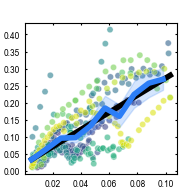

In [10]:
cm = 1/2.54  # centimeters in inches
fig,ax = plt.subplots(figsize = (5*cm,5*cm))

select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
select = select[select['C_rate']>1e-2]
select = select[select['P_rate']>5e-3]
select = select[select['time_hour_binned'] <= 50]
select = select[select['real_root']=="Carrot Vasilis"]
select = select[select['strain']=="C2"]
grouped = select.groupby('cat_P_rate')
filtered_groups = grouped.filter(lambda x: x['unique_id'].nunique() >= 5)
select = filtered_groups

sns.scatterplot(data=select,x='P_rate',y='C_rate',hue="unique_id_str",s= 20,alpha = 0.6,legend=False,palette = "viridis"
                # palette=strain_to_color
               )
# sns.lineplot(data=select,x='cat_P_rate',y='C_rate',hue="unique_id_str",alpha = 0.6,legend=False,
#              palette = "viridis",
#                 errorbar = None# palette=strain_to_color
#                )
line_style = {"linewidth":4}  # Default line style for other types

sns.regplot(data=select,x='P_rate',y='C_rate',scatter=False,ci = None,color = 'black', line_kws=line_style)

sns.lineplot(data=select,x='cat_P_rate',y='C_rate',estimator = "mean",color="red",palette=strain_to_color,hue="strain",linewidth = 4)
ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')
# ax.set_xscale("log")
# ax.set_yscale("log")

plt.legend().remove()

plt.savefig(os.path.join(path_figure,'Figure4A.pdf'), transparent=True, bbox_inches='tight')


In [11]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(select['P_rate'], select['C_rate'])

slope

2.514645334878642

In [12]:
select['strain'].unique()

array(['C2'], dtype=object)

Carrot Toby_Agg 4
Carrot Toby_Clarum 4
Carrot Toby_A5 9
Carrot Vasilis_A5 6
Carrot Vasilis_C2 11
Carrot Toby_C2 18
2024-06-21 16:12:10,138-[WARNING]- fontTools.subset:2983 -> meta NOT subset; don't know how to subset; dropped


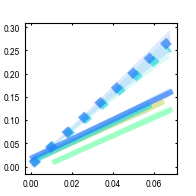

In [33]:
# n_colors = len(df['fungus'].unique())

# palette = sns.color_palette("rainbow", n_colors)
# strain_to_color = dict(zip(df['fungus'].unique(), palette))
linestyles = ['-',':']
root_to_linestyle = {'Carrot Toby': linestyles[0], 'Carrot Vasilis': linestyles[1]}
linewidths = [4,6]
root_to_linewidth = {'Carrot Toby': linewidths[0], 'Carrot Vasilis': linewidths[1]}
select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
# select = select[select['real_root']=='Carrot Toby']

select = select[select['C_rate']>0]
select = select[select['fungalC']=='100P/100N/100C']

select = select[select['P_rate']<=1.5/22]
select = select[select['P_rate']>0]
select = select[select['strain']!='C3']

# select = select[select['C_rate']>0.01]
# select = select[select['P_rate']>0.1]

# select = select[select['strain'].isin(['C2','A5','Agg','Clarum'])]
select = select[select['real_root'].isin(['Carrot Toby','Carrot Vasilis'])]
fig,ax = plt.subplots(figsize = (5*cm,5*cm))

# Loop through each category and plot a regplot for each
for category in select['rootXstrain'].unique():
    subset = select[select['rootXstrain'] == category]
    print(category,len(subset['unique_id'].unique()))
    fungus = subset['strain'].iloc[0]
    real_root = subset['real_root'].iloc[0]  # Extract real_root value from the subset
    linestyle = root_to_linestyle[real_root]  # Get the linestyle based on real_root
    linewidth = root_to_linewidth[real_root]  # Get the linestyle based on real_root
    
    grouped = subset.groupby('cat_P_rate')
    mini = 2 if fungus!='C3' else 1 
    filtered_groups = grouped.filter(lambda x: x['unique_id'].nunique() >= mini)
    # sns.scatterplot(data=subset,x='P_rate',y='C_rate',size = 5,alpha = 0.3,legend=False,ax = ax,color=strain_to_color[fungus])
    sns.regplot(data=filtered_groups,x='P_rate',y='C_rate',ax=ax,color=strain_to_color[fungus],line_kws={'linestyle' : linestyle,"alpha" : 0.7,"linewidth": linewidth},scatter = False)

    # sns.lineplot(data=subset,x='cat_P_rate',y='C_rate',estimator = "mean",ax=ax,color=strain_to_color[fungus],linestyle = linestyle)
ax.set_ylabel('$\Phi_C$ \n ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(0,0.1)
# ax.set_ylim(0,0.5)

plt.savefig(os.path.join(path_figure,'Figure4B.pdf'), transparent=True, bbox_inches='tight')


In [26]:
subset['P_rate']

1612    0.006045
1613    0.006019
1614    0.006411
1615    0.007746
1616    0.008476
1617    0.008835
1618    0.009671
1619    0.010599
1620    0.010716
1621    0.010931
1622    0.011670
1623    0.012496
1624    0.012990
1625    0.013670
1626    0.014232
1627    0.015146
1628    0.016509
1629    0.016815
1630    0.018399
1631    0.019394
1632    0.020201
1633    0.020848
1634    0.020521
1635    0.021647
1636    0.022460
1643    0.007523
1647    0.007714
1648    0.008374
1649    0.007986
1650    0.008014
1651    0.007846
Name: P_rate, dtype: float64

In [21]:
subset['tot_length_study'].iloc[0],subset['tot_surface_area_study'].iloc[0]

(117371.9504810523, 1831904.156829576)

In [25]:
404300 * np.pi*3*2*Vmax

0.025148889014957796

In [ ]:
def zero_regplot(data, x, y, ax, label, scatter=True, n_boot=1000, color=None,linestyle=None):
    # Extract x and y data
    x_data = data[x]
    y_data = data[y]

    # Bootstrap resampling
    bootstrapped_slopes = []
    for _ in range(n_boot):
        # Resample with replacement
        resampled_indices = np.random.choice(range(len(x_data)), size=len(x_data), replace=True)
        resampled_x = x_data.iloc[resampled_indices]
        resampled_y = y_data.iloc[resampled_indices]

        # Fit a line through the origin
        slope = np.sum(resampled_x * resampled_y) / np.sum(resampled_x * resampled_x)
        bootstrapped_slopes.append(slope)

    # Calculate slope and confidence intervals
    bootstrapped_slopes = np.array(bootstrapped_slopes)
    slope_estimate = bootstrapped_slopes.mean()
    ci_lower = np.nanpercentile(bootstrapped_slopes, 2.5)
    ci_upper = np.nanpercentile(bootstrapped_slopes, 97.5)

    # Create regression line
    x_vals = x_data
    y_vals = slope_estimate * x_vals
    # Plot
    if scatter:
        ax.scatter(x_data, y_data, alpha=0.7,s=3,color=color)
    ax.plot(x_vals, y_vals, color=color, label=f'{label} Slope: {slope_estimate:.2f}',linestyle=linestyle)
    # print(ci_lower , ci_upper ,label)
    ax.fill_between(x_vals, ci_lower * x_vals, ci_upper * x_vals, color=color, alpha=0.2)

    # Set labels and legend
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()

In [ ]:
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis, get_time_plate_info_long_from_analysis
all_analysis_folders = get_analysis_folders()
#for P
plates = [
"416_20230705",
"427_20230707",
"420_20230705",
"431_20230627",
"474_20230807",
"460_20230807",
"464_20230807",
"440_20230723",
"436_20230717",
"443_20230720",
"439_20230804",
"470_20230709",
'478_20230814', '468_20230809', '447_20230821', '487_20230922',
       '492_20230901', '471_20230821', '486_20231009',
       '494_20230908', '482_20230908', '495_20231013', '463_20231013',
       '491_20231013', '481_20231005', '483_20231005',
    '490_20231003',
       '485_20230929',
]
plates += [
"503_20240129",
# "507_20240202",
"517_20240202",
"518_20240212",
# "527_20240126",
"529_20240214"
]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_long_from_analysis(analysis_folders,False)
def calculate_integral(df, column, new_column):
    # Calculate the time difference within each group
    df['time_since_begin_hour'] = df['time_since_begin_h'].dt.total_seconds() / 3600.0
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_hour'].transform(lambda x: x.diff())

    # Calculate the average length density within each group
    df['avg_length_density'] = df.groupby('unique_id')[column].transform(lambda x: x.rolling(window=2).mean())

    # Calculate the "area" (using Trapezoidal rule) for each pair of rows within each group
    df['area'] = df['time_diff'] * df['avg_length_density']

    # Perform the integration (cumulative sum of "area") within each group
    df[new_column] = df.groupby('unique_id')['area'].transform(lambda x: x.cumsum())

    # Drop the helper columns if needed
    df.drop(['time_diff', 'avg_length_density', 'area'], axis=1, inplace=True)
for i in range(18):
    calculate_integral(time_plate_info,f'SA_region_{i}',f'integrated_SA_{i}')
for i in range(18):
    calculate_integral(time_plate_info,f'length_density_region_{i}',f'integrated_L_{i}')


In [ ]:
analysis_folders

In [ ]:
C_max2 = 1.53

def fit_function(x, C_max):
    return 1+C_max * 1/x**(3/2)
# Read the Excel file
path = r'C:\Users\coren\Documents\PhD\Pexperiment'
path_excel = os.path.join(path,'summary.xlsx')
df_P = pd.read_excel(path_excel)
df_P['date_from_unique_id'] = pd.to_datetime(df_P['unique_id'].str.split('_').str[1], format='%Y%m%d')
    
# Convert 'day' column to datetime
df_P['day_sample'] = pd.to_datetime(df_P['day_sample'], format='%Y%m%d')  # Update the format as necessary
df_P['day_start'] = pd.to_datetime(df_P['start'], format='%Y%m%d')  # Update the format as necessary

df_P['time_elapsed'] = df_P['day_sample'] - df_P['day_start']
df_P['time_elapsed_day'] = df_P['time_elapsed'].dt.days
df_P['time_since_crossing'] = df_P['day_sample'] - df_P['date_from_unique_id']
df_P['t2 (day)'] = df_P['time_since_crossing'].dt.days
df_P['t1 (day)'] = df_P['time_elapsed_day']-df_P['t2 (day)']
df_P['treatment'] = df_P['treatment'].fillna('none')
df_P['wet_weight_measured'] = df_P['wet weight']

df_P['wet weight'] = df_P['wet weight']-df_P['lost weight']
df_P['totP (ug)'] = df_P['totP (ug)'] * fit_function(df_P['totP (ug)'], C_max2)
df_P['Sample_name'] = df_P['Sample_name'].str.replace('bottom','0')
df_P['Sample_name'] = df_P['Sample_name'].str.replace('up','1')
df_P['Sample_name'] = df_P['Sample_name'].str.replace('top','1')
df_P['Sample_name'] = df_P['Sample_name'].str.replace('agar','0')



df_P = df_P.loc[df_P['plate']!=487]
df_P = df_P.loc[df_P['type'] == 'agar']
df_P['pos'] = df_P['Sample_name'].str.split('-').str.get(1).astype(int)

In [ ]:
from plates import plates as plates2
df_sum,smallP = load_all(plates2)
smallP['time_since_begin_hour'] = smallP['time_since_begin_h'] / 3600.0


In [ ]:
def calculate_derivative(df, column, new_column, window=1):
    # Ensure the DataFrame is sorted by 'unique_id' and 'time_since_begin_h'
    df.sort_values(by=['unique_id', 'time_since_begin_h'], inplace=True)
    
    # Calculate the time difference and value difference over the desired window
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_h'].transform(lambda x: x.diff(window)).fillna(0)
    df['value_diff'] = df.groupby('unique_id')[column].transform(lambda x: x.diff(window)).fillna(0)

    # Calculate the derivative (value difference divided by time difference)
    # Be cautious about dividing by zero. If 'time_diff' is 0, set derivative to NaN or handle accordingly.
    df[new_column] = df.apply(lambda x: x['value_diff'] / x['time_diff'] if x['time_diff'] != 0 else None, axis=1)

    # Drop the helper columns
    df.drop(['time_diff', 'value_diff'], axis=1, inplace=True)
def calculate_integral(df, column, new_column):
    # Calculate the time difference within each group
    df.sort_values(by=['unique_id', 'time_since_begin_h'], inplace=True)
    df['time_since_begin_hour'] = df['time_since_begin_h']
    df['time_diff'] = df.groupby('unique_id')['time_since_begin_hour'].transform(lambda x: x.diff())

    # Calculate the average length density within each group
    df['avg_length_density'] = df.groupby('unique_id')[column].transform(lambda x: x.rolling(window=2).mean())

    # Calculate the "area" (using Trapezoidal rule) for each pair of rows within each group
    df['area'] = df['time_diff'] * df['avg_length_density']

    # Perform the integration (cumulative sum of "area") within each group
    df[new_column] = df.groupby('unique_id')['area'].transform(lambda x: x.cumsum())

    # Drop the helper columns if needed
    df.drop(['time_diff', 'avg_length_density', 'area'], axis=1, inplace=True)
final_data = smallP
    
calculate_integral(final_data,f'tot_surface_area_study',f'integrated_SA')
calculate_derivative(final_data,f'tot_biovolume_study',f'derivative_biovolume', window=5)
calculate_derivative(final_data,f'tot_volume',f'derivative_tot_biovolume', window=5)

Vmax = 3e-9 #ugP/um2/hour
density = 1e-6 #ug/um3
dry_wet_ratio = 0.3
carbon_ratio = 0.5
carbon_ratio_spore = 0.9
dry_wet_ratio_spore = 0.9
density_spore = 0.9e-6
respiration_ratio = 0.5
final_data['P_rate'] =final_data['tot_surface_area_study']*Vmax
final_data['C_rate'] = final_data['derivative_biovolume']*density*dry_wet_ratio*carbon_ratio/respiration_ratio
final_data['totC_hypha'] = final_data['tot_biovolume_study']*density*dry_wet_ratio*carbon_ratio
final_data['tot_volume'] = final_data['spore_volume']+final_data['tot_biovolume_study']
final_data['totC_spore'] = final_data['spore_volume']*density_spore*dry_wet_ratio_spore*carbon_ratio_spore
final_data['totC_tot'] = final_data['totC_hypha'] + final_data['totC_spore']

final_data = final_data.reset_index(drop=True)
final_data_select = final_data.loc[final_data['time_since_begin_h_shifted']<=150]

max_c_rate_time = final_data_select.loc[final_data_select.groupby('unique_id')['C_rate'].idxmax(), ['unique_id', 'time_since_begin_h_shifted']]

# Step 2: Merge this information back to the original DataFrame
final_data = final_data.merge(max_c_rate_time, on='unique_id', suffixes=('', '_max_c_rate'))
calculate_derivative(final_data,f'tot_surface_area_study',f'derivative_SA', window=5)
calculate_derivative(final_data,f'totC_tot',f'derivative_C', window=5)

calculate_derivative(final_data,f'area_sep_comp',f'derivative_area', window=5)
final_data['instant_SA_dens'] = final_data['derivative_SA']/final_data['derivative_area']
calculate_derivative(final_data,f'tot_biovolume_study',f'derivative_BV', window=5)
final_data['instant_BV_dens'] = final_data['derivative_BV']/final_data['derivative_area']
calculate_derivative(final_data,f'tot_length_study',f'derivative_L', window=5)
final_data['instant_L_dens'] = final_data['derivative_L']/final_data['derivative_area']
final_data['instant_C_dens'] = final_data['derivative_C']/final_data['derivative_area']

final_data['instant_radius'] = final_data['instant_BV_dens']/final_data['instant_SA_dens']*2


In [ ]:
selection = final_data[final_data['strain']=="C2"]
selection = selection[selection['real_root']=='Carrot Vasilis']
selection = selection[selection['treatment']=="1P/100N/100C"]
# selection = selection[~selection['unique_id'].isin([468_20230809])]


In [ ]:
cm = 1/2.54  # centimeters in inches

# selection = df_sum[df_sum['FungalSide']=='0P/100N/100C']
selection = final_data[final_data['strain']=="C2"]
selection = selection[selection['real_root']=='Carrot Vasilis']
selection = selection[selection['treatment']=="1P/100N/100C"]
selection = selection[~selection['unique_id'].isin([468_20230809])]
selection= selection[selection['instant_C_dens']>0]
selection= selection[selection['instant_C_dens']<=0.025].copy()
first_category = selection["fungalC"].unique()[0]
# first_category = selection["fungalC"].unique()[1]

palette = {category: "blue" if category == first_category else "purple" for category in selection["fungalC"].unique()}
fig,ax = plt.subplots(figsize = (5*cm,5*cm))
sns.boxplot(data=selection, y="instant_C_dens", x="fungalC", palette=palette, showfliers=False)
sns.stripplot(selection,y="instant_C_dens",x = "fungalC",color= "black",size=1)
ax.set_ylabel('$d_{Carbon}$ ($mm^3/mm^2$)')
ax.set_xlabel('$C_{P,0,fungal}$')
ax.set_xticklabels(['high', 'low'])
plt.savefig(os.path.join(path_figure,'Figure4C.pdf'), transparent=True, bbox_inches='tight')

# plt.tight_layout()

In [ ]:
selection[["instant_L_dens","fungalC"]].to_csv('highlowP.csv')

In [ ]:
merged_df = pd.merge(smallP, time_plate_info, on=['folder','unique_id','folder'], how='left')

In [ ]:
slope = -3.3973588349543932e-09

In [ ]:
unique_ids = merged_df['unique_id'].unique()
unique_ids = ['471_20230821','474_20230807']
unique_ids += [
"503_20240129",
# "507_20240202",
"517_20240202",
"518_20240212",
# "527_20240126",
"529_20240214"
]
fig,ax = plt.subplots()
# Loop through each unique ID and plot the data
maxCP = 0.5
for unique_id in unique_ids:
    # Filter the DataFrame for the current unique ID
    df_subset = merged_df[merged_df['unique_id'] == int(unique_id)].copy()
    # Extract the relevant columns
    time_since_begin_h = df_subset['time_since_begin_h_shifted']
    select = df_P[df_P['arrangement'] == 'basic']
    
    for i in range(18):
        subselect = select[select['pos']==i+1]
        C_P = maxCP+df_subset[f'integrated_SA_{i}']/np.mean(subselect['wet weight'])*slope
        # rate_P =  (C_P>0)*(C_P/maxCP)*df_subset[f'SA_region_{i}']*Vmax
        rate_P =  (C_P>0)*df_subset[f'SA_region_{i}']*Vmax
        
        df_subset.loc[df_subset['unique_id'] == int(unique_id), f'C_P_{i}'] = C_P
        df_subset.loc[df_subset['unique_id'] == int(unique_id), f'P_rate_{i}'] =rate_P
            # Create a plot for the current unique ID
        ax.plot(time_since_begin_h, rate_P, label=f'ID {unique_id}')
    p_rate_columns = [f'P_rate_{i}' for i in range(18)]
    merged_df.loc[merged_df['unique_id'] == int(unique_id), 'sum_P_rate'] = df_subset[p_rate_columns].sum(axis=1)
    ax.plot(time_since_begin_h, merged_df.loc[merged_df['unique_id'] == int(unique_id), 'sum_P_rate'], label=f'ID {unique_id}',color="black")
    
# Identify overlapping columns, excluding the keys used for merging
overlapping_columns = [col for col in merged_df.columns if col in final_data.columns and col not in ['folder', 'unique_id', 'time_since_begin_hour']]

# Drop these columns from the right dataframe
merged_df_dropped = merged_df.drop(columns=overlapping_columns)

# Perform the merge
select_data_merge = pd.merge(final_data, merged_df_dropped, on=['folder', 'unique_id', 'folder'], how='left')

In [ ]:
n_colors = len(df_sum['fungus'].unique())

palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(df_sum['fungus'].unique(), palette))
linestyles = ['-',':']
root_to_linestyle = {'Carrot Toby': linestyles[0], 'Carrot Vasilis': linestyles[1]}

select = select_data_merge[select_data_merge['time_since_begin_h_shifted'] < select_data_merge['time_since_begin_h_shifted_max_c_rate']]
# select = select[select['real_root']=='Carrot Toby']

select = select[select['C_rate']>0]

select = select[select['P_rate']<=0.1]
select = select[select['P_rate']>0]
# select = select[select['sum_P_rate']>0]

# select = select[select['real_root']=='Carrot Toby']


select = select[select['strain'].isin(['C2'])]
select = select[select['real_root'].isin(['Carrot Vasilis'])]
select = select[~select['unique_id'].isin([468_20230809])]




fig,ax = plt.subplots(figsize = (5*cm,5*cm))
# fig,ax = plt.subplots()

# Loop through each category and plot a regplot for each
for category in select['fungalC'].unique():
    subset = select[select['fungalC'] == category]
    fungus = subset['strain'].iloc[0]
    real_root = subset['real_root'].iloc[0]  # Extract real_root value from the subset
    linestyle = root_to_linestyle[real_root]  # Get the linestyle based on real_root
    if category =='100P/100N/100C':
        # zero_regplot(data=subset, x='P_rate', y='C_rate', ax=ax, label=category,scatter =True)
        sns.regplot(data=subset, x='P_rate', y='C_rate', ax=ax, label=category,scatter =True,scatter_kws={"s":4})
        
    else:
        # zero_regplot(data=subset, x='sum_P_rate', y='C_rate', ax=ax, label=category,scatter =True,color = "purple")
        sns.regplot(data=subset, x='sum_P_rate', y='C_rate', ax=ax, label=category,scatter =True,scatter_kws={"s":4},color="purple")

ax.set_ylabel('$\Phi_C$ ($\mu g/h$)')
ax.set_xlabel('$\Phi_P$ ($\mu g/h$)')

plt.legend().remove()
plt.savefig(os.path.join(path_figure,'Figure4D.pdf'), transparent=True, bbox_inches='tight')

# plt.tight_layout()

In [ ]:

n_colors = len(df['fungus'].unique())

palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(df['fungus'].unique(), palette))
linestyles = ['-',':']
root_to_linestyle = {'Carrot Toby': linestyles[0], 'Carrot Vasilis': linestyles[1]}

select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
# select = select[select['real_root']=='Carrot Toby']

select = select[select['C_rate']>0]

select = select[select['P_rate']<=1.3]
select = select[select['P_rate']>0.1]

select = select[select['strain'].isin(['C2'])]
select = select[select['real_root'].isin(['Carrot Vasilis'])]
fig, ax = plt.subplots()

# Loop through each category and plot a regplot for each
for category in select['fungalC'].unique():
    subset = select[select['fungalC'] == category]

    # sns.scatterplot(data=subset,x='P_rate',y='C_rate',size = 5,alpha = 0.3,legend=False,ax = ax,color=strain_to_color[fungus])

    sns.lineplot(data=subset,x='cat_P_rate',y='C_rate',estimator = "mean",ax=ax)
ax.set_ylabel('C expenditure rate ($\mu g/h$)')
ax.set_xlabel('P provision rate ($\mu g/h$)')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(0.02,0.5)
plt.tight_layout()


In [ ]:

select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
select = select[select['C_rate']>0]
# select = select[select['P_rate']<=3]
select = select[select['P_rate']>0]
select = select[select['real_root']=='Carrot Toby']




fig, ax = plt.subplots()

# Loop through each category and plot a regplot for each
for category in select['strain'].unique():
    subset = select[select['strain'] == category]
    grouped = subset.groupby('cat_P_rate')
    filtered_groups = grouped.filter(lambda x: x['unique_id'].nunique() >= 2)

    sns.lineplot(data=filtered_groups,x='cat_P_rate',y='C_rate',estimator = "mean",ax=ax)
ax.set_ylabel('C expenditure rate ($\mu g/h$)')
ax.set_xlabel('P provision rate ($\mu g/h$)')
plt.tight_layout()


In [ ]:
n_colors = len(df['fungus'].unique())

palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(df['fungus'].unique(), palette))
linestyles = ['-',':']
root_to_linestyle = {'Carrot Toby': linestyles[0], 'Carrot Vasilis': linestyles[1]}

select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
# select = select[select['real_root']=='Carrot Toby']

# select = select[select['C_rate']>0]
select = select[select['fungalC']=='100P/100N/100C']

select = select[select['P_rate']<=1.3]
# select = select[select['P_rate']>0]

# select = select[select['strain'].isin(['C2','A5','Agg','Clarum'])]
select = select[select['real_root'].isin(['Carrot Toby','Carrot Vasilis'])]
select = select[select['real_root'].isin(['Carrot Toby'])]

fig, ax = plt.subplots()

# Loop through each category and plot a regplot for each
for category in select['rootXstrain'].unique():
    subset = select[select['rootXstrain'] == category]
    fungus = subset['strain'].iloc[0]
    real_root = subset['real_root'].iloc[0]  # Extract real_root value from the subset
    linestyle = root_to_linestyle[real_root]  # Get the linestyle based on real_root
    grouped = subset.groupby('cat_P_rate')
    filtered_groups = grouped.filter(lambda x: x['unique_id'].nunique() >= 2)
    # sns.scatterplot(data=subset,x='P_rate',y='C_rate',size = 5,alpha = 0.3,legend=False,ax = ax,color=strain_to_color[fungus])

    sns.lineplot(data=filtered_groups,x='cat_P_rate',y='C_rate',estimator = "mean",ax=ax,color=strain_to_color[fungus],linestyle = linestyle)
    # sns.regplot(data=filtered_groups,x='cat_P_rate',y='C_rate',ax=ax,color=strain_to_color[fungus],ci = None,scatter = False)
    
ax.set_ylabel('C expenditure rate ($\mu g/h$)')
ax.set_xlabel('P provision rate ($\mu g/h$)')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(0.02,0.5)
plt.tight_layout()


In [ ]:
n_colors = len(df['fungus'].unique())

palette = sns.color_palette("rainbow", n_colors)
strain_to_color = dict(zip(df['fungus'].unique(), palette))
linestyles = ['-',':']
root_to_linestyle = {'Carrot Toby': linestyles[0], 'Carrot Vasilis': linestyles[1]}

select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
# select = select[select['real_root']=='Carrot Toby']

select = select[select['C_rate']>0]
select = select[select['P_rate']<=1.5]
select = select[select['P_rate']>0]
select = select[select['strain'].isin(['C2','A5'])]
select = select[select['real_root'].isin(['Carrot Toby','Carrot Vasilis'])]
select = select[select['fungalC']=='100P/100N/100C']




fig, ax = plt.subplots()

# Loop through each category and plot a regplot for each
for category in select['rootXstrain'].unique():
    subset = select[select['rootXstrain'] == category]
    fungus = subset['strain'].iloc[0]
    real_root = subset['real_root'].iloc[0]  # Extract real_root value from the subset
    linestyle = root_to_linestyle[real_root]  # Get the linestyle based on real_root
    zero_regplot(data=subset, x='P_rate', y='C_rate', ax=ax, label=category,scatter =True,color=strain_to_color[fungus],linestyle = linestyle)

# Setting labels and legend
ax.set_ylabel('C expenditure rate ($\mu g/h$)')
ax.set_xlabel('P provision rate ($\mu g/h$)')
ax.legend(title='Real Root')

plt.tight_layout()



In [ ]:
select['fungalC'].unique()

In [ ]:

select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
select = select[select['C_rate']>0]
select = select[select['P_rate']<=3]
select = select[select['P_rate']>0]
select = select[select['real_root']=='Carrot Toby']




fig, ax = plt.subplots()

# Loop through each category and plot a regplot for each
for category in select['strain'].unique():
    subset = select[select['strain'] == category]

    sns.scatterplot(data=subset,x='P_rate',y='C_rate',size = 5,alpha = 0.3,legend=False,ax = ax)

    sns.lineplot(data=subset,x='cat_P_rate',y='C_rate',estimator = "mean",ax=ax)
ax.set_ylabel('C expenditure rate ($\mu g/h$)')
ax.set_xlabel('P provision rate ($\mu g/h$)')
plt.tight_layout()


In [ ]:
from scipy.stats import linregress


slopes = []  # to store the slopes for each unique_id
lengths = []
for unique_id in df['unique_id']:
    # Filter the data for the current unique_id
    select = select_data[select_data['unique_id'] == int(unique_id)]
    select = select[select['time_since_begin_h_shifted'] < select['time_since_begin_h_shifted_max_c_rate']]
    select = select[select['C_rate']>0]
    # Ensure there are enough data points for regression
    if len(select) >= 10:
        # Perform linear regression
        result = linregress(select['P_rate'], select['C_rate'])
        slopes.append(result.slope)
    else:
        slopes.append(None)  # or some placeholder if there's not enough data
    lengths.append(len(select))
# Add the slopes to the DataFrame
df['slope'] = slopes
df['lengths'] = lengths


# Your plotting code remains as is, this is just for calculating the slopes


In [ ]:
df['size_point'] = 20
marker_symbols = {
    "C2": 'circle',
    "A5": 'square',
    "Agg": 'diamond',
    "Clarum": 'cross',
    "C3": 'star',
    
    
    # Add more mappings as needed
}

# Map the strain to the marker symbol in the DataFrame
df['marker'] = df['fungus'].map(marker_symbols)
df['FungalSide'] = df['FungalSide'].fillna("100P/100N/100C")
df['FungalSide'] = df['FungalSide'].replace("100P100N100C","100P/100N/100C")
df['FungalSide'] = df['FungalSide'].replace("100P100N100C","100P/100N/100C")

df['treatment'] = df['treatment'].replace("1P100N100C","1P/100N/100C")
df['fungus'] = df['fungus'].replace("A5sp3","A5")
df['category_combination'] = df[['treatment', 'FungalSide',"real_root"]].apply(lambda x: '_'.join(x.astype(str)), axis=1)

df['full_category_combination'] = df[['fungus','treatment', 'FungalSide',"real_root"]].apply(lambda x: '_'.join(x.astype(str)), axis=1)


In [ ]:
import scipy.stats as stats
select= df[df['FungalSide']=="100P/100N/100C"]
select= select[select['slope']>0]
# select= select[select['real_root']!="Chicorium"]
# select= select[select['fungus']=="C2"]


# Assuming 'select' is your filtered DataFrame
kruskal_result = stats.kruskal(*[group["slope"].values for name, group in select.groupby("real_root")])

print(f"Kruskal-Wallis test result: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'select' is your DataFrame
tukey_result = pairwise_tukeyhsd(endog=select['lengths'], groups=select['real_root'], alpha=0.05)
print(tukey_result)


In [ ]:
fig, ax = plt.subplots()
select= df[df['FungalSide']=="100P/100N/100C"]
# select= select[select['fungus']=="C2"]

sns.boxplot(select,x = "real_root",y="slope")
ax.set_xticklabels(ax.get_xticklabels(), fontsize='small')  # You can adjust 'small' to a specific number if needed

In [ ]:
fig, ax = plt.subplots()
select= df[df['FungalSide']=="100P/100N/100C"]
# select= select[select['fungus']=="C2"]

sns.boxplot(select,x = "real_root",y="lengths")
ax.set_xticklabels(ax.get_xticklabels(), fontsize='small')  # You can adjust 'small' to a specific number if needed

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='speed', y='slope', color='category_combination',
                 hover_data=['plate_id',"fungus"], size='size_point', symbol='fungus', symbol_map=marker_symbols)
fig.update_layout(height=600)  # You can change these values as per your preference
# Show the plot
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='age', y='slope', color='category_combination',
                 hover_data=['plate_id',"fungus"], size='size_point', symbol='fungus', symbol_map=marker_symbols)
fig.update_layout(height=600)  # You can change these values as per your preference
# Show the plot
fig.show()

In [ ]:
# fig, ax = plt.subplots()
select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
select = select[select['C_rate']>0]

counts = select.groupby("unique_id").count()['C_rate']
ids = counts[counts>10].index
select = select[select['unique_id'].isin(ids)]

g = sns.FacetGrid(select, col="unique_id", col_wrap=5)
g.map_dataframe(sns.regplot, x="P_rate",y='C_rate')

In [ ]:
from random import choice
# select = select_data.loc[select_data['time_since_begin_h_shifted']<=tmax]
select = select_data
select = select_data[select_data['time_since_begin_h_shifted'] < select_data['time_since_begin_h_shifted_max_c_rate']]
select = select[select['C_rate']>0]
# select = select[select['acceleration_biovolume']>0]

unique_id = choice(select['unique_id'].unique())
unique_id = 531_20221222

select = select[select['unique_id']==unique_id]
fig, ax = plt.subplots()

sns.scatterplot(data=select,x='time_since_begin_h_shifted',y='totC_spore',color="blue")
sns.scatterplot(data=select,x='time_since_begin_h_shifted',y='totC_hypha',color="red")

fig, ax = plt.subplots()

sns.scatterplot(data=select,x='time_since_begin_h_shifted',y='C_rate',hue="unique_id")
ax.vlines(select["time_since_begin_h_shifted_max_c_rate"].iloc[0],0,0.25)
fig, ax = plt.subplots()

sns.scatterplot(data=select,x='P_rate',y='C_rate')
sns.regplot(data=select,x='P_rate',y='C_rate')